In [1]:

%load_ext autoreload
%autoreload 2
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
from run_generate_times  import read_spans , get_snp_dfs , find_span_mosaic, find_centers
from TimeFinder import TimeFinder

path = './result/from0_to47.txt'
path = None


In [3]:
from utils import read_full_spans
MIN_THRESHOLD = 50
spans = read_full_spans(50, path)

Parsing file ./result/from42_to49.txt
Parsing file ./result/from112_to119.txt
Parsing file ./result/from105_to112.txt
Parsing file ./result/from14_to21.txt
Parsing file ./result/from119_to126.txt
Parsing file ./result/from126_to133.txt
Parsing file ./result/from70_to77.txt
Parsing file ./result/from133_to140.txt
Parsing file ./result/from91_to98.txt
Parsing file ./result/from98_to105.txt
Parsing file ./result/from56_to63.txt
Parsing file ./result/from28_to35.txt
Parsing file ./result/from63_to70.txt
Parsing file ./result/from0_to7.txt
Parsing file ./result/from21_to28.txt
Parsing file ./result/from49_to56.txt
Parsing file ./result/from35_to42.txt
Parsing file ./result/from84_to91.txt
Parsing file ./result/from77_to84.txt
Parsing file ./result/from7_to14.txt


In [4]:
spans[1]  # Start, End, # Remove,# SNPs 

[48063256, 48063476, ['HG03485_1', 'HG03055_0'], 2]

In [6]:
from SNPDataSet import get_snp_dfs
mutation_df = get_snp_dfs(MIN_THRESHOLD)
A= mutation_df['position'].unique()
A.sort()
muts = [p for p in A]


In [7]:
WINDOW_SIZE = [2, 3,4,10,20,30,40,50,60, 100]
# WINDOW_SIZE.extend([i for i in range(51,60)])
print(WINDOW_SIZE)
RR = {}

for w in WINDOW_SIZE:
    print(f"Checking for {w}")
    Result = {}
    uu = 0
    for m in muts:
        uu+=1
        if uu%500 == 0:
            print(f'{uu}/{len(muts)}')
        max_len = -1
        max_remove = -100
        for s in spans:
            if m == s[0]:
                if s[3]> max_len:
                    max_len = s[3]
                    max_remove = len(s[2])
                if s[3] == w:
                    Result[m]= len(s[2])
                    break
        if not m in Result:
            # pass
            if uu+w<=len(muts):
                print(f"{m} Not found! {max_len}")
                Result[m] = 1000
            else:
                Result[m] = max_remove
                pass
                # print('End of block limitation')

    RR[w] = Result

[2, 3, 4, 10, 20, 30, 40, 50, 60, 100]
Checking for 2
Checking for 3
Checking for 4
Checking for 10
Checking for 20
Checking for 30
Checking for 40
Checking for 50
Checking for 60
Checking for 100


In [8]:

X= muts
Yz = {}
for w in WINDOW_SIZE:    
    Y = []
    for x in X:
        if x in RR[w]:
            Y.append(RR[w][x])
        else:
            Y.append(0)
    Yz[w] = Y

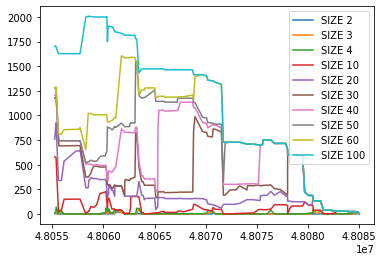

In [9]:

# importing package
import matplotlib.pyplot as plt
  
# plot lines
for w in WINDOW_SIZE:
    plt.plot(X, Yz[w], label=f'SIZE {w}')
plt.legend()
plt.show()

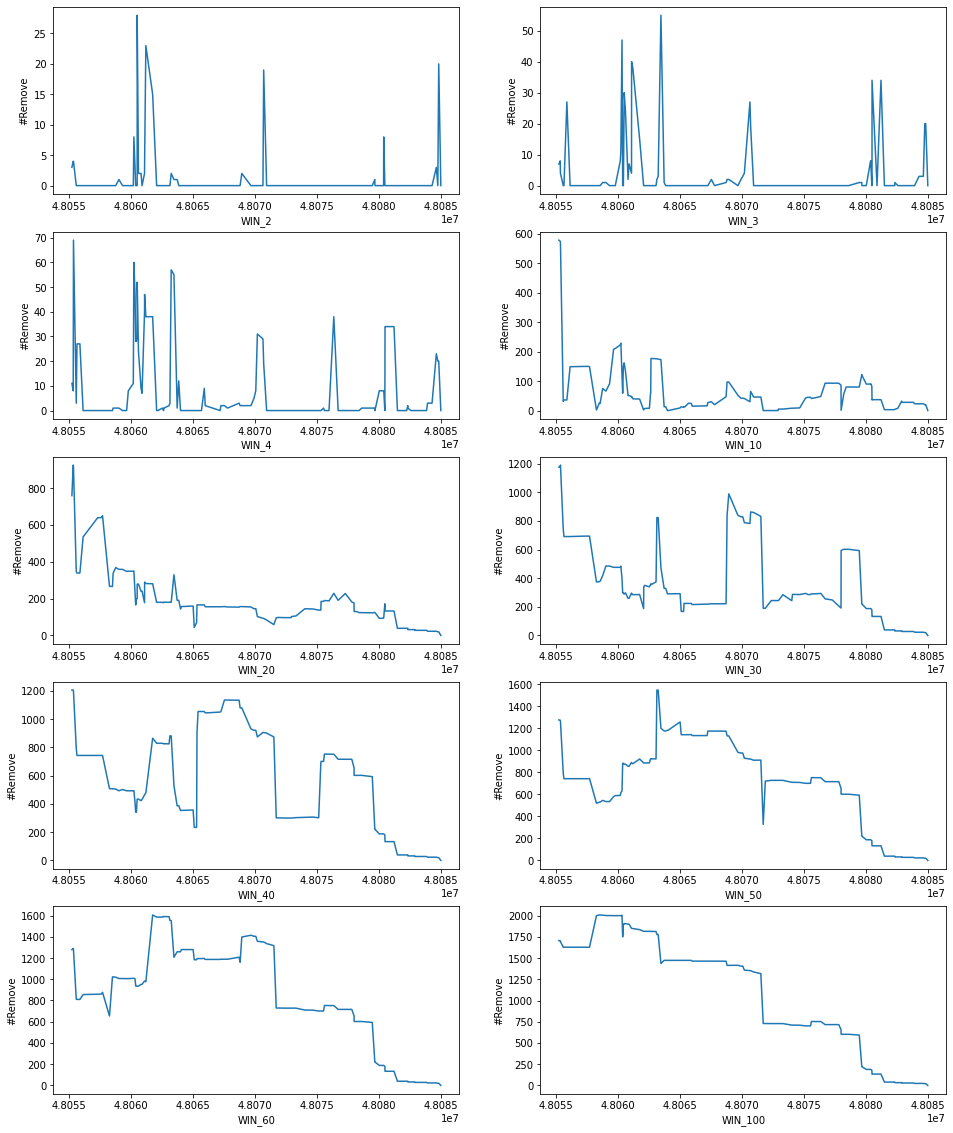

In [10]:
# Initialise the subplot function using number of rows and columns
COLS = 2
x_count = int(len(WINDOW_SIZE)/COLS)
y_count = COLS
figure, axis = plt.subplots(x_count,y_count)

figure.set_size_inches(16, 4*x_count)
# For Sine Function
X_ha = []
Y_ha = []
for i in range(len(WINDOW_SIZE)):
    Y_ha.append(Yz[WINDOW_SIZE[i]][:200])
    # IDX = [i+1 for i in range(len(X))][:200]
    IDX = X
    X_ha.append (IDX)
    
for i in range(len(WINDOW_SIZE)):
    x_index = int(i/COLS)
    y_index = int(i%COLS)
    axis[x_index,y_index].plot(X_ha[i], Y_ha[i], label=f'SIZE {WINDOW_SIZE[i]}')
# axis[0, 0].plot(X_ha[0], Y_ha[0])
# axis[0, 0].set_title("#5")
    plt.setp(axis[x_index, y_index], xlabel=f'WIN_{WINDOW_SIZE[i]}', ylabel="#Remove")

# plt.setp(axis[1], xlabel='Parameter', ylabel="#Mosaics")

# plt.xticks(fontsize=14)

# Combine all the operations and display
plt.show()

In [69]:
FIXED_LENGTH_WINDOWS = [10,100,1000,2000,3000, 4000, 5000, 10000, 20000, 30000]

def find_haplo(start, end):
    candidates =  [s for s in spans if s[0]==start and s[1]==end]
    if len(candidates) == 0:
        # print(f'Not found any haplo in range {start} to {end}')
        return None
    return candidates[0]
res = {}
j= 0
for size in FIXED_LENGTH_WINDOWS:
    res[size]= []
    temppp_starts = {}
    for m in muts:
        j+=1
        j%10 ==0 and print(f'{j} / {len(muts)*len(FIXED_LENGTH_WINDOWS)}')
        prev =[None, None]
        for i in range(size):
            start = m- i

            if start in temppp_starts:
                continue
            end = start + size
            muts_in_range = [m for m in muts if m>=start and m<=end]
            if len(muts_in_range) ==0:
                print(f'No mutation found in range {start} to {end}. MUTATION_POSITION = {m}')
            firstSNPinRange = muts_in_range[0]
            lastSNPinRange = muts_in_range[-1]
            if prev[0] == firstSNPinRange and prev[1] == lastSNPinRange:
                # print(f'{m} is in the same haplo as {prev}')
                temppp_starts[start] = True
                res[size].append([start, res[size][-1][1]])
                continue
            prev = [firstSNPinRange, lastSNPinRange]

            haplo = find_haplo(firstSNPinRange, lastSNPinRange)
            if haplo:
                temppp_starts[start] = True
                res[size].append([start, len(haplo[2])])
        

10 / 1230
20 / 1230
30 / 1230
40 / 1230
50 / 1230
60 / 1230
70 / 1230
80 / 1230
90 / 1230
100 / 1230
110 / 1230
120 / 1230
130 / 1230
140 / 1230
150 / 1230
160 / 1230
170 / 1230
180 / 1230
190 / 1230
200 / 1230
210 / 1230
220 / 1230
230 / 1230
240 / 1230
250 / 1230
260 / 1230
270 / 1230
280 / 1230
290 / 1230
300 / 1230
310 / 1230
320 / 1230
330 / 1230
340 / 1230
350 / 1230
360 / 1230
370 / 1230
380 / 1230
390 / 1230
400 / 1230
410 / 1230
420 / 1230
430 / 1230
440 / 1230
450 / 1230
460 / 1230
470 / 1230
480 / 1230
490 / 1230
500 / 1230
510 / 1230
520 / 1230
530 / 1230
540 / 1230
550 / 1230
560 / 1230
570 / 1230
580 / 1230
590 / 1230
600 / 1230
610 / 1230
620 / 1230
630 / 1230
640 / 1230
650 / 1230
660 / 1230
670 / 1230
680 / 1230
690 / 1230
700 / 1230
710 / 1230
720 / 1230
730 / 1230
740 / 1230
750 / 1230
760 / 1230
770 / 1230
780 / 1230
790 / 1230
800 / 1230
810 / 1230
820 / 1230
830 / 1230
840 / 1230
850 / 1230
860 / 1230
870 / 1230
880 / 1230
890 / 1230
900 / 1230
910 / 1230
920 / 12

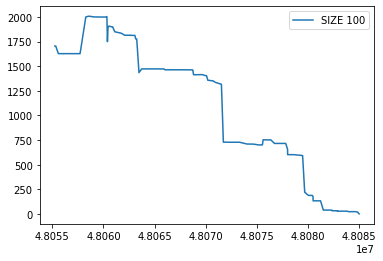

In [70]:
data = {}
for k in FIXED_LENGTH_WINDOWS:
    tempX = []
    tempY = []
    for r in res[k]:
        tempX.append(r[0])
        tempY.append(r[1])
    data[k] = [tempX, tempY]

# importing package
import matplotlib.pyplot as plt
  
# plot lines
plt.plot(X, Y, label=f'SIZE {w}')
plt.legend()
plt.show()

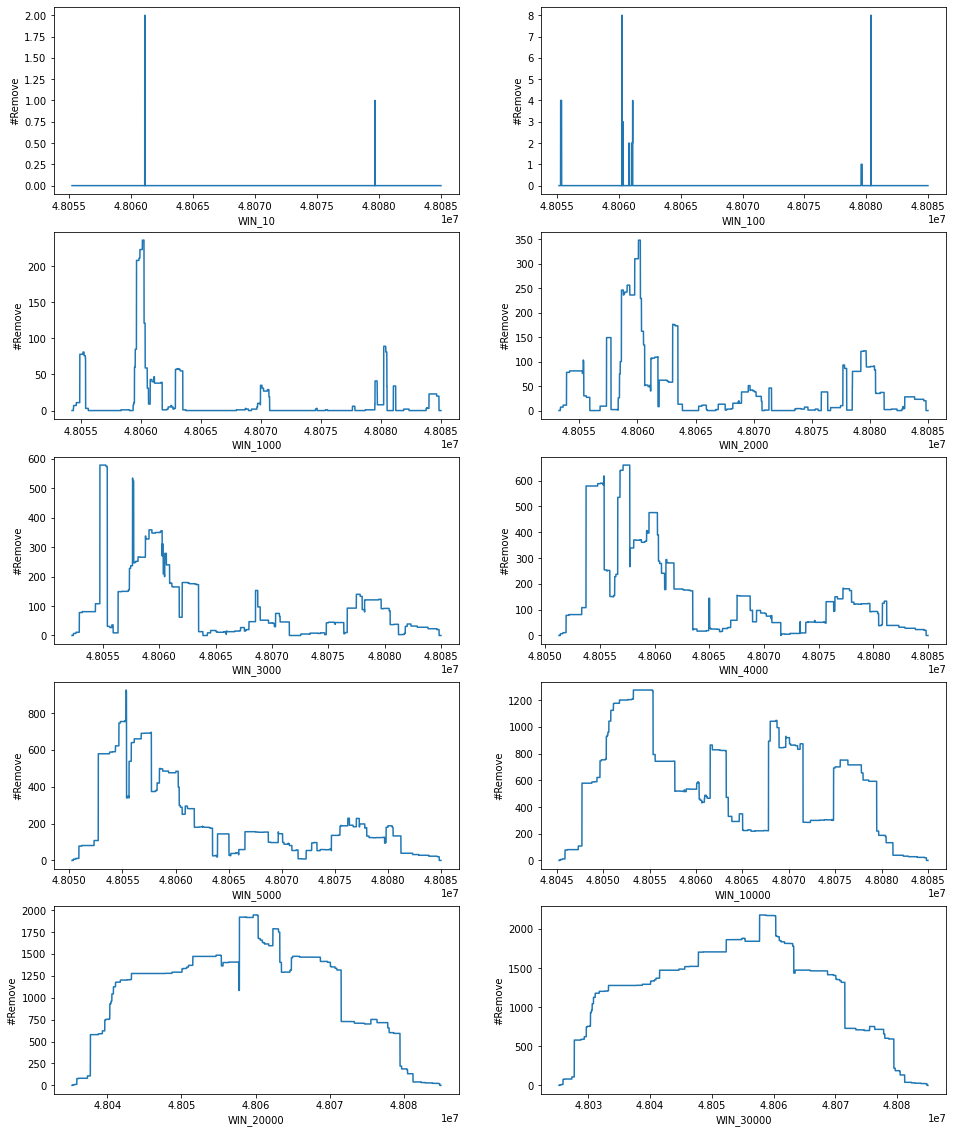

In [71]:
# Initialise the subplot function using number of rows and columns
COLS = 2
x_count = int(len(FIXED_LENGTH_WINDOWS)/COLS)
y_count = COLS
figure, axis = plt.subplots(x_count,y_count)

figure.set_size_inches(16, 4*x_count)
# For Sine Function
X_ha = []
Y_ha = []
for i in range(len(FIXED_LENGTH_WINDOWS)):
    X_ha.append(data[FIXED_LENGTH_WINDOWS[i]][0])
    Y_ha.append(data[FIXED_LENGTH_WINDOWS[i]][1])

for i in range(len(FIXED_LENGTH_WINDOWS)):
    x_index = int(i/COLS)
    y_index = int(i%COLS)
    list1, list2 = zip(*sorted(zip(X_ha[i], Y_ha[i])))
    axis[x_index,y_index].plot(list1, list2, label=f'SIZE {FIXED_LENGTH_WINDOWS[i]}')
# axis[0, 0].plot(X_ha[0], Y_ha[0])
# axis[0, 0].set_title("#5")
    plt.setp(axis[x_index, y_index], xlabel=f'WIN_{FIXED_LENGTH_WINDOWS[i]}', ylabel="#Remove")

# plt.setp(axis[1], xlabel='Parameter', ylabel="#Mosaics")

# plt.xticks(fontsize=14)

# Combine all the operations and display
plt.show()

In [72]:
res[1000]


[[48055250, 81],
 [48055249, 81],
 [48055248, 81],
 [48055247, 81],
 [48055246, 81],
 [48055245, 81],
 [48055244, 81],
 [48055243, 81],
 [48055242, 81],
 [48055241, 81],
 [48055240, 81],
 [48055239, 81],
 [48055238, 81],
 [48055237, 81],
 [48055236, 81],
 [48055235, 81],
 [48055234, 81],
 [48055233, 81],
 [48055232, 81],
 [48055231, 81],
 [48055230, 81],
 [48055229, 81],
 [48055228, 81],
 [48055227, 81],
 [48055226, 81],
 [48055225, 81],
 [48055224, 81],
 [48055223, 81],
 [48055222, 81],
 [48055221, 81],
 [48055220, 81],
 [48055219, 81],
 [48055218, 81],
 [48055217, 81],
 [48055216, 81],
 [48055215, 81],
 [48055214, 81],
 [48055213, 81],
 [48055212, 81],
 [48055211, 81],
 [48055210, 81],
 [48055209, 81],
 [48055208, 81],
 [48055207, 81],
 [48055206, 81],
 [48055205, 81],
 [48055204, 81],
 [48055203, 81],
 [48055202, 81],
 [48055201, 81],
 [48055200, 81],
 [48055199, 81],
 [48055198, 81],
 [48055197, 81],
 [48055196, 81],
 [48055195, 81],
 [48055194, 81],
 [48055193, 81],
 [48055192, 81

In [28]:
len()

1083

In [67]:
X_ha[2]

[48055250,
 48055249,
 48055248,
 48055247,
 48055246,
 48055245,
 48055244,
 48055243,
 48055242,
 48055241,
 48055240,
 48055239,
 48055238,
 48055237,
 48055236,
 48055235,
 48055234,
 48055233,
 48055232,
 48055231,
 48055230,
 48055229,
 48055228,
 48055227,
 48055226,
 48055225,
 48055224,
 48055223,
 48055222,
 48055221,
 48055220,
 48055219,
 48055218,
 48055217,
 48055216,
 48055215,
 48055214,
 48055213,
 48055212,
 48055211,
 48055210,
 48055209,
 48055208,
 48055207,
 48055206,
 48055205,
 48055204,
 48055203,
 48055202,
 48055201,
 48055200,
 48055199,
 48055198,
 48055197,
 48055196,
 48055195,
 48055194,
 48055193,
 48055192,
 48055191,
 48055190,
 48055189,
 48055188,
 48055187,
 48055186,
 48055185,
 48055184,
 48055183,
 48055182,
 48055181,
 48055180,
 48055179,
 48055178,
 48055177,
 48055176,
 48055175,
 48055174,
 48055173,
 48055172,
 48055171,
 48055170,
 48055169,
 48055168,
 48055167,
 48055166,
 48055165,
 48055164,
 48055163,
 48055162,
 48055161,
 48055160,

In [40]:
muts[:20]

[48055250,
 48055357,
 48055377,
 48055602,
 48055659,
 48055894,
 48056154,
 48057324,
 48057628,
 48057719,
 48058280,
 48058518,
 48058574,
 48058781,
 48059038,
 48059335,
 48059661,
 48059798,
 48060201,
 48060246]

In [118]:
mutation_df

,position,sample,state
0,48055094,HG03055_0,1
1,48055094,HG03485_1,1
2,48055095,NA20505_1,1
3,48055110,HG02256_1,1
4,48055247,HG01305_0,1
...,...,...,...
123472,48084989,NA21137_0,1
123473,48084989,NA21141_0,1
123474,48084989,NA21141_1,1
123475,48084989,NA21142_0,1


In [20]:
from SNPDataSet import get_snp_dfs
from utils import convert_mutation_df_to_vcf
from SpanFinderNew import SpanFinder


MAX_THRESHOLD = 30
def find_for_items(start, end):

    XX = sf.find_all_spans(MAX_THRESHOLD, start, end)

    with open(f'./result/from{start}_to{end}.txt', 'w') as f:
        for item in XX:
            f.write("%s\n" % item)
# GGG = find_for_items(48055094, 48055247)

In [75]:

mutsz = get_snp_dfs()
vcf = convert_mutation_df_to_vcf(mutsz)

sf = SpanFinder(vcf, False)


TypeError: get_snp_dfs() missing 1 required positional argument: 'min_threshold'

([], {'00': 5005, '01': 2, '10': 1, '11': 0}, '11')

In [25]:
temp_data = Yz[51]
for x in range(len(temp_data)):
    if temp_data[x]<175 and  temp_data[x]>125 :
        print(x)
        break


87


In [28]:
INDEX = 87

48057719

In [31]:
spns = sf.find_spans(X[87], 10)

In [37]:
sf.find_combinations( X[87], 48059335, [])

(['HG03055_0',
  'HG03485_1',
  'HG00111_1',
  'HG00125_1',
  'HG00146_1',
  'HG00158_0',
  'HG00256_0',
  'HG00256_1',
  'HG00288_1',
  'HG00380_0',
  'HG00553_0',
  'HG00732_0',
  'HG01064_1',
  'HG01107_1',
  'HG01188_0',
  'HG01281_0',
  'HG01325_1',
  'HG01360_0',
  'HG01395_0',
  'HG01413_1',
  'HG01438_0',
  'HG01522_0',
  'HG01531_1',
  'HG01607_0',
  'HG01610_0',
  'HG01612_1',
  'HG01632_1',
  'HG01668_1',
  'HG01694_1',
  'HG01765_1',
  'HG01770_1',
  'HG01783_1',
  'HG01890_1',
  'HG01980_0',
  'HG02185_1',
  'HG02232_1',
  'HG02450_1',
  'HG02493_0',
  'HG02511_1',
  'HG02554_1',
  'HG02733_1',
  'HG02870_1',
  'HG02891_0',
  'HG02896_1',
  'HG02938_0',
  'HG02976_0',
  'HG03007_0',
  'HG03048_0',
  'HG03072_1',
  'HG03074_0',
  'HG03123_1',
  'HG03419_1',
  'HG03432_1',
  'HG03433_0',
  'HG03470_1',
  'HG03521_0',
  'HG03571_1',
  'HG03577_0',
  'HG03629_0',
  'HG03990_0',
  'HG04182_0',
  'NA11829_1',
  'NA11831_0',
  'NA11930_0',
  'NA12006_0',
  'NA12275_1',
  'NA12748

In [40]:
sf.find_combinations( X[89], 48059335, [])

([], {'00': 4401, '01': 605, '10': 2, '11': 0}, '11')

In [36]:
for x in spns:
    if x[0]> X[87+45] and x[0]< X[87+65] :
        print(x[0], len(x[1]))

48059128 11
48059222 11
48059269 11
48059283 11
48059335 151
48059375 151
48059481 151
48059485 151
48059603 163
48059618 166
48059661 167
48059666 167
48059686 167
48059687 167
48059718 167
48059758 167
48059788 167
48059798 167
48059805 168


In [192]:
for i in range(len(muts)):
    if muts[i] == 48084989:
        print(i)
        break

927


In [176]:
muts[50]

48056398

In [178]:
48058045

48058045

In [244]:
KK = sf.find_spans(48055094, 10)

In [245]:
len(KK)

38

In [248]:

LL = sf.find_spans(48055971, 10)

In [243]:
len(JJ)

57

In [249]:
len(LL)

70

In [251]:
MM = sf.find_spans(LL[-1][0], 10)

In [252]:
len(MM)

54

In [253]:
MM[-1]

[48060377,
 ['HG02976_0',
  'HG03687_0',
  'NA18876_0',
  'HG01102_0',
  'HG03433_0',
  'HG03953_1',
  'HG02628_1',
  'HG01521_0',
  'HG02315_0',
  'HG03235_0',
  'HG03247_1',
  'HG01977_0',
  'NA18489_1',
  'HG02442_0',
  'HG01746_0',
  'HG03646_1',
  'NA19153_1',
  'HG03779_1',
  'HG03388_1',
  'HG03397_1',
  'HG01773_0',
  'HG03103_0',
  'HG02938_1',
  'NA20850_1',
  'HG01362_1',
  'NA21127_1',
  'HG00638_1',
  'NA21137_0',
  'NA19108_0',
  'HG04099_0',
  'HG00240_1',
  'HG03279_1',
  'HG00623_1',
  'HG03595_1',
  'HG01989_0',
  'HG03934_1',
  'NA18878_1',
  'HG03744_1',
  'HG00244_0',
  'NA20859_0',
  'HG03557_1',
  'HG03163_0',
  'HG03897_1',
  'NA20517_1',
  'HG02981_0',
  'HG02537_0',
  'NA12273_1',
  'HG00108_0',
  'HG03240_1',
  'NA19917_1',
  'HG03755_0',
  'HG03868_0',
  'HG01311_1',
  'HG01440_1',
  'HG03571_1',
  'HG03830_1',
  'NA20127_0']]

In [265]:
NN  = sf.find_spans(MM[-1][0], 10)

5008
 position 48060385, remove 0
 position 48060393, remove 0
 position 48060420, remove 0
 position 48060449, remove 0
 position 48060510, remove 0
 position 48060512, remove 0
 position 48060514, remove 28
 position 48060543, remove 28
 position 48060544, remove 28
 position 48060555, remove 29
 position 48060567, remove 29
 position 48060617, remove 42
 position 48060690, remove 42
 position 48060717, remove 42
 position 48060752, remove 43
 position 48060801, remove 43
 position 48060825, remove 45
 position 48060826, remove 45
 position 48060838, remove 45
 position 48060872, remove 45
total remove = 534, max threshold arrived in position 48060872


In [258]:
len(NN)

19

In [260]:
len(NN[-1][1])

45

In [262]:
5008*10/100

500.8

In [267]:
len(muts)

928

In [268]:
48055079 - 48085036 

-29957

In [41]:
vcf

,48055094,48055095,48055110,48055247,48055250,48055294,48055331,48055340,48055357,48055364,...,48084704,48084720,48084731,48084747,48084770,48084820,48084822,48084863,48084980,48084989
HG03055_0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
HG03485_1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
NA20505_1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
HG02256_1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
HG01305_0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA12829_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
NA18566_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
NA19235_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
HG03779_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
temp_x = []
temp_y =[]
for thr in range(2000, 2010):
    ctr = 0
    for col in vcf.columns:
        count = vcf[col].sum()
        if count > thr:
            ctr+=1
    # print(ctr)
    temp_x.append(thr)
    temp_y.append(ctr)

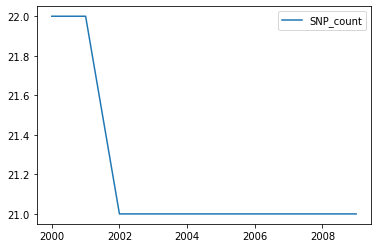

In [70]:
# importing package
import matplotlib.pyplot as plt
  
# plot lines
plt.plot(temp_x, temp_y, label=f'SNP_count')
plt.legend()
plt.show()

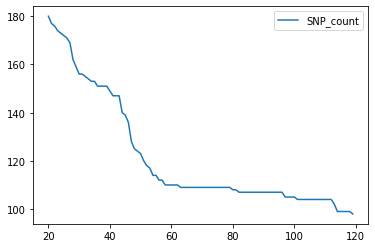

In [59]:
# importing package
import matplotlib.pyplot as plt
  
# plot lines
plt.plot(temp_x, temp_y, label=f'SNP_count')
plt.legend()
plt.show()

In [75]:

mutsz2 = get_snp_dfs(50)


In [76]:
vcf2 = convert_mutation_df_to_vcf(mutsz2)


0, 119144
10000, 119144
20000, 119144
30000, 119144
40000, 119144
50000, 119144
60000, 119144
70000, 119144
80000, 119144
90000, 119144
100000, 119144
110000, 119144


In [77]:
vcf2

,48055250,48055357,48055377,48055602,48055659,48055894,48056154,48057324,48057628,48057719,...,48082882,48082887,48083526,48083838,48083921,48084282,48084628,48084747,48084820,48084989
HG00108_0,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,1,1,1
HG00111_1,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,1,1,0
HG00125_1,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,1,1,0
HG00146_1,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,1,1,0
HG00158_0,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA19461_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
NA19916_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
NA20332_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
HG03779_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
from scipy.stats import differential_entropy, norm

In [74]:
from scipy.special import rel_entr

#define two probability distributions
P = [.05, .1, .2, .05, .15, .25, .08, .12]
Q = [.3, .1, .2, .1, .1, .02, .08, .1]


#calculate (P || Q)
sum(rel_entr(P, Q))

0.589885181619163

0.589885181619163

In [77]:

from SNPDataSet import get_snp_dfs
from utils import convert_mutation_df_to_vcf
mutsz = get_snp_dfs(MIN_THRESHOLD)
vcf_test = convert_mutation_df_to_vcf(mutsz)

0, 119144
10000, 119144
20000, 119144
30000, 119144
40000, 119144
50000, 119144
60000, 119144
70000, 119144
80000, 119144
90000, 119144
100000, 119144
110000, 119144


In [78]:
vcf_test

,48055250,48055357,48055377,48055602,48055659,48055894,48056154,48057324,48057628,48057719,...,48082882,48082887,48083526,48083838,48083921,48084282,48084628,48084747,48084820,48084989
HG00108_0,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,1,1,1
HG00111_1,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,1,1,0
HG00125_1,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,1,1,0
HG00146_1,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,1,1,0
HG00158_0,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA19461_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
NA19916_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
NA20332_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
HG03779_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
def find_unique_haplos(positions, samples):
    val_counts = vcf_test.loc[samples].value_counts(subset=positions)
    result = {}
    for x in val_counts.keys():
        k = ''.join(map(str, x))
        result[k] =  val_counts[x]
    return result

In [128]:
def get_mutations_between(start, end):
    return [m for m in muts if m>=start and m<=end]

In [202]:
from  scipy.special import kl_div
def find_KL_DIV(first_parts, second_parts, whole_parts):
    A = []
    B = []
    total_samples_first = sum(first_parts.values())
    total_samples_second = sum(second_parts.values())
    total_samples_whole = sum(whole_parts.values())

    for k1 in first_parts.keys():
        for k2 in second_parts.keys():
            whole_k = k1+k2
            a = first_parts[k1]/total_samples_first
            b = second_parts[k2]/total_samples_second
            A.append(a*b)
            if whole_k in whole_parts.keys():
                B.append(whole_parts[whole_k]/total_samples_whole)
            else:
                B.append(0)

    return sum(kl_div(B, A))

def find_NORM_2(first_parts, second_parts, whole_parts):
    A = []
    B = []
    total_samples_first = sum(first_parts.values())
    total_samples_second = sum(second_parts.values())
    total_samples_whole = sum(whole_parts.values())

    for k1 in first_parts.keys():
        for k2 in second_parts.keys():
            whole_k = k1+k2
            a = first_parts[k1]/total_samples_first
            b = second_parts[k2]/total_samples_second
            A.append(a*b)
            if whole_k in whole_parts.keys():
                B.append(whole_parts[whole_k]/total_samples_whole)
            else:
                B.append(0)
    total = 0
    for i in range(len(A)):
        total+=pow(A[i]-B[i], 2)
    return math.sqrt( total)

In [221]:
KL_WINDOW_SIZE = [10, 12,14,16]
# WINDOW_SIZE.extend([i for i in range(51,60)])
print(KL_WINDOW_SIZE)
KL_Result = {}
samples = list(vcf_test.index)


for w in KL_WINDOW_SIZE:
    print(f"Checking for KL of {w}")
    sub_w = w//2
    Result = {}
    uu = 0
    for m in muts:
        uu+=1
        if uu%500 == 0:
            print(f'{uu}/{len(muts)}')
        max_len = -1
        max_haplo = -100
        for s in spans:
            if m == s[0]:
                if s[3]> max_len:
                    max_len = s[3]
                    max_haplo = s
                if s[3] == w:
                    max_haplo = s
                    break
        print(f'{uu} of {len(muts)}')
        # pass
        if uu+w>=len(muts):
            print(f"{m} Not found! {max_len}")
            # Result[m] = 0
        else:
            all_mutations = get_mutations_between(max_haplo[0], max_haplo[1])
            first_mutations = all_mutations[:sub_w]
            second_mutations = all_mutations[sub_w:]
            first_haplo = find_haplo(first_mutations[0], first_mutations[-1])
            second_haplo = find_haplo(second_mutations[0], second_mutations[-1])

            first_samples = [sp for sp in samples if not sp in first_haplo[2]]
            second_samples = [sp for sp in samples if not sp in second_haplo[2]]
            whole_samples = [sp for sp in samples if not sp in max_haplo[2]]

            first_parts = find_unique_haplos(first_mutations, first_samples)
            second_parts = find_unique_haplos(second_mutations, second_samples)
            whole_parts = find_unique_haplos(all_mutations, whole_samples)
            # print('---')
            # print(all_mutations)
            # print(first_parts)
            # print(second_parts)
            # print(whole_parts)
            KL = find_NORM_2(first_parts, second_parts, whole_parts)

            Result[second_mutations[0]] = KL
            pass
                # print('End of block limitation')

    KL_Result[w] = Result

[10, 12, 14, 16]
Checking for KL of 10
1 of 123
2 of 123
3 of 123
4 of 123
5 of 123
6 of 123
7 of 123
8 of 123
9 of 123
10 of 123
11 of 123
12 of 123
13 of 123
14 of 123
15 of 123
16 of 123
17 of 123
18 of 123
19 of 123
20 of 123
21 of 123
22 of 123
23 of 123
24 of 123
25 of 123
26 of 123
27 of 123
28 of 123
29 of 123
30 of 123
31 of 123
32 of 123
33 of 123
34 of 123
35 of 123
36 of 123
37 of 123
38 of 123
39 of 123
40 of 123
41 of 123
42 of 123
43 of 123
44 of 123
45 of 123
46 of 123
47 of 123
48 of 123
49 of 123
50 of 123
51 of 123
52 of 123
53 of 123
54 of 123
55 of 123
56 of 123
57 of 123
58 of 123
59 of 123
60 of 123
61 of 123
62 of 123
63 of 123
64 of 123
65 of 123
66 of 123
67 of 123
68 of 123
69 of 123
70 of 123
71 of 123
72 of 123
73 of 123
74 of 123
75 of 123
76 of 123
77 of 123
78 of 123
79 of 123
80 of 123
81 of 123
82 of 123
83 of 123
84 of 123
85 of 123
86 of 123
87 of 123
88 of 123
89 of 123
90 of 123
91 of 123
92 of 123
93 of 123
94 of 123
95 of 123
96 of 123
97 of 123


In [222]:
max_win = max(KL_WINDOW_SIZE)
results_final = {}
for k in KL_WINDOW_SIZE:
    results_final[k] = []
TOTAL = []

X_TOTAL = list(KL_Result[max_win].keys())

for x in X_TOTAL:
    total = 0
    for k in KL_WINDOW_SIZE:
        val = KL_Result[k][x]
        results_final[k].append(val)
        total+=val
    TOTAL.append(total)



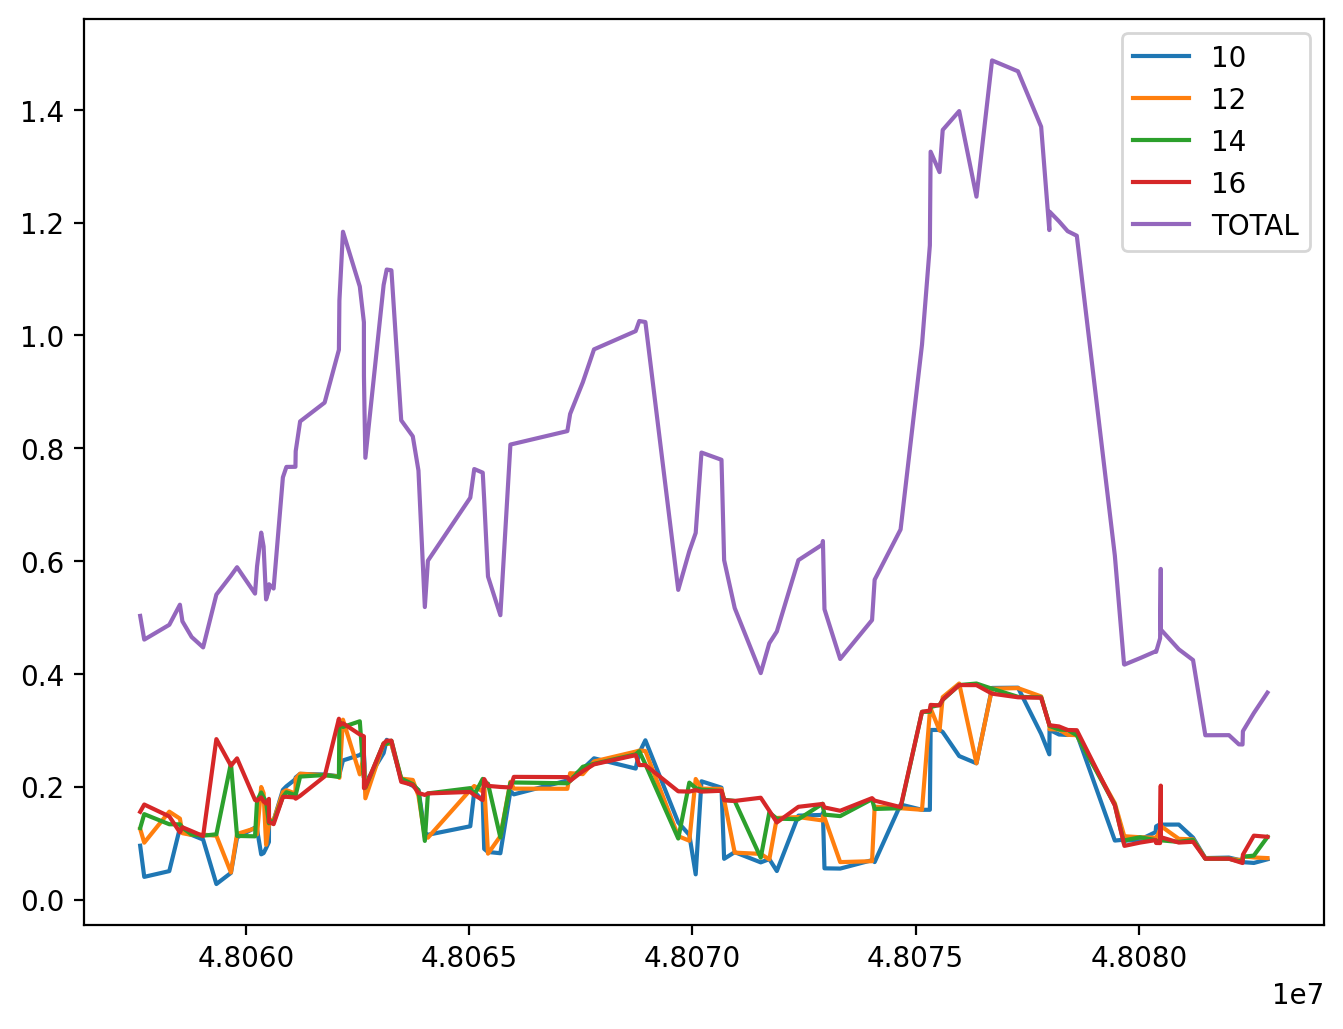

In [224]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=200)

for k in KL_WINDOW_SIZE:
    plt.plot(X_TOTAL,results_final[k], label=f'{k}')

plt.plot(X_TOTAL,TOTAL, label=f'TOTAL')

plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (123,) and (118,)

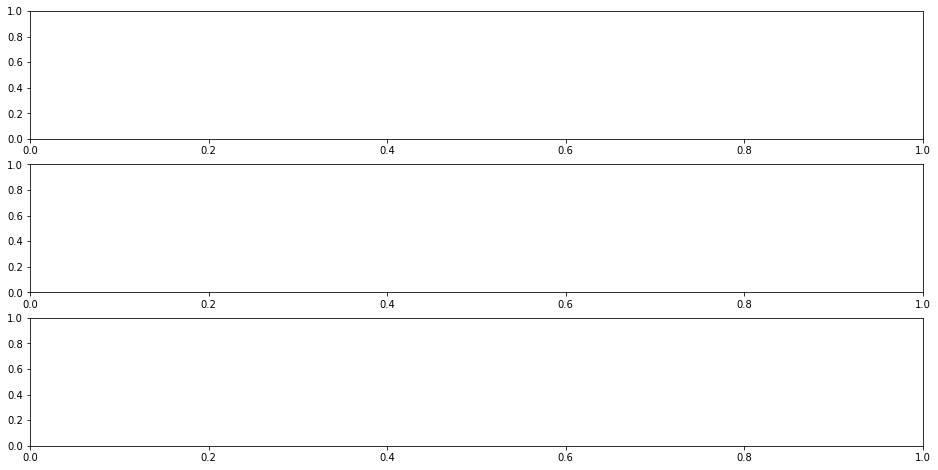

In [192]:
# importing package
import matplotlib.pyplot as plt
figure, axis = plt.subplots(3, 1)

figure.set_size_inches(16, 8)
axis[0].plot(X_ha[2], yy, label=f'SIZE  zarb')
axis[1].plot(X_ha[2], Y_ha[0], label=f'SIZE {10}')
axis[2].plot(X_ha[3], Y_ha[1], label=f'SIZE {20}')
axis[3].plot(X_ha[3], Y_ha[2], label=f'SIZE {20}')
# plot lines
# plt.plot(X_ha[2], yy, label=f'SNP_count')
# plt.legend()
plt.show()

In [175]:
X_ha[2]

[48055250,
 48055357,
 48055377,
 48055602,
 48055659,
 48055894,
 48056154,
 48057324,
 48057628,
 48057719,
 48058280,
 48058518,
 48058574,
 48058781,
 48059038,
 48059335,
 48059661,
 48059798,
 48060201,
 48060246,
 48060339,
 48060393,
 48060449,
 48060512,
 48060514,
 48060617,
 48060825,
 48060904,
 48061106,
 48061112,
 48061211,
 48061760,
 48062080,
 48062091,
 48062171,
 48062548,
 48062640,
 48062641,
 48062654,
 48062673,
 48063082,
 48063151,
 48063256,
 48063476,
 48063735,
 48063862,
 48064005,
 48064074,
 48065023,
 48065112,
 48065302,
 48065335,
 48065420,
 48065697,
 48065922,
 48065999,
 48067198,
 48067260,
 48067544,
 48067795,
 48068728,
 48068809,
 48068946,
 48069682,
 48069930,
 48070073,
 48070202,
 48070651,
 48070710,
 48070947,
 48071530,
 48071722,
 48071891,
 48072374,
 48072916,
 48072923,
 48072958,
 48073310,
 48074024,
 48074082,
 48074663,
 48075143,
 48075319,
 48075336,
 48075536,
 48075607,
 48075976,
 48076363,
 48076712,
 48077293,
 48077812,

In [135]:
print(total_samples_first)
print(total_samples_second)
print(total_samples_whole)

5008
4985
5008


In [143]:
sum(A)

0.9999999999999999

In [144]:
sum(B)

0.9954073482428114

0.19474610217466556